# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb).

> **The dataset columns are**:
* imdb_id
* popularity
* budget
* revenue
* original_title
* cast
* homepage
* director
* tagline
* keywords
* overview
* runtime
* genres
* production_companies
* release_date
* vote_count
* vote_average
* release_year
* budget_adj
* revenue_adj


### Question(s) for Analysis

1. What are the most profitable movies?
2. What are the highly voted movies and their profits?
3. What is the trend in annual movie release?
4. What is the annual profits made from movies?
5. What is the comparison between popularity and profits made from movies?

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas numpy seaborn matplotlib

<a id='wrangling'></a>
## Data Wrangling

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
# Viewing the last 20 lines of data
df.tail(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10846,17102,tt0059127,0.212716,0,0,Dracula: Prince of Darkness,Christopher Lee|Barbara Shelley|Andrew Keir|Fr...,NaN,Terence Fisher,"DEAD for Ten Years DRACULA, Prince of Darkness...",...,"Whilst vacationing in the Carpathian Mountain,...",90,Horror,Seven Arts Productions|Hammer Film Productions,1/9/66,16,5.7,1966,0.000000e+00,0.000000e+00
10847,28763,tt0060548,0.034555,0,0,Island of Terror,Peter Cushing|Edward Judd|Carole Gray|Eddie By...,NaN,Terence Fisher,How could they stop the devouring death...that...,...,A small island community is overrun with creep...,89,Science Fiction|Horror,Planet Film Productions|Protelco,6/20/66,13,5.3,1966,0.000000e+00,0.000000e+00
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,NaN,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,...,The science of miniaturization has been unlock...,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,...,Harry Dean (Michael Caine) has a perfect plan ...,109,Action|Comedy|Crime,Universal Pictures,12/16/66,14,6.1,1966,0.000000e+00,0.000000e+00
10850,26268,tt0060490,0.202473,0,0,Harper,Paul Newman|Lauren Bacall|Julie Harris|Arthur ...,NaN,Jack Smight,Harper takes a case - and the payoff is murder.,...,Harper is a cynical private eye in the best tr...,121,Action|Drama|Thriller|Crime|Mystery,Warner Bros.,2/23/66,14,6.0,1966,0.000000e+00,0.000000e+00
10851,15347,tt0060182,0.342791,0,0,Born Free,Virginia McKenna|Bill Travers|Geoffrey Keen|Pe...,NaN,James Hill,From The Pages Of The Beloved Best Seller... A...,...,Born Free (1966) is an Open Road Films Ltd./Co...,95,Adventure|Drama|Action|Family|Foreign,High Road,6/22/66,15,6.6,1966,0.000000e+00,0.000000e+00
10852,37301,tt0060165,0.227220,0,0,A Big Hand for the Little Lady,Henry Fonda|Joanne Woodward|Jason Robards|Paul...,NaN,Fielder Cook,All the action you can take...all the adventur...,...,A naive traveler in Laredo gets involved in a ...,95,Western,Eden Productions Inc.,5/31/66,11,6.0,1966,0.000000e+00,0.000000e+00
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.2,1966,0.000000e+00,0.000000e+00
10854,31602,tt0060232,0.146402,0,0,The Chase,Marlon Brando|Jane Fonda|Robert Redford|E.G. M...,NaN,Arthur Penn,The chase is on!,...,Most everyone in town thinks that Sheriff Cald...,135,Thriller|Drama|Crime,Horizon Pictures|Columbia Pictures Corporation,2/17/66,17,6.0,1966,0.000000e+00,0.000000e+00
10855,13343,tt0059221,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,NaN,Alan Rafkin,G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...,...,Luther Heggs aspires to being a reporter for h...,90,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,0.000000e+00


In [5]:
# Knowing how large the dataset is in terms of rows and columns
df.shape

(10866, 21)

In [6]:
# Getting general info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# Getting the data type of each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
# Getting the descriptive statistics summary of dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
# checking for null/missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# checking for duplicated values
df.duplicated().sum()

1

In [11]:
# checking for cases of repeated Original Titles
df['original_title'].duplicated().sum()

295

In [12]:
# checking for unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning

*From __Data Wrangling__ done above, I have noted that the following cleaning need to done*
1. Remove duplicated data.
2. Remove null values.
3. Convert budget and revenue columns to float dtype
4. Fill zeroes/inaccurate data in budget,budget_adj values and revenue,revenue_adj values.
5. Drop redundant columns and correcting datatypes.
6. Split values in every colunm, that are separated with pipe "|"

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# 1. Remove duplicated data.
df.drop_duplicates(inplace=True)

# Checking if duplicated data have been removed
df.duplicated().sum()

0

In [6]:
# 2. Remove null values.
interest_columns = ['cast', 'director', 'genres', 'production_companies']
for col in interest_columns :
    df = df[~df[col].isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 21 columns):
id                      9772 non-null int64
imdb_id                 9770 non-null object
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
homepage                2637 non-null object
director                9772 non-null object
tagline                 7635 non-null object
keywords                8666 non-null object
overview                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null flo

In [7]:
# 3. Convert budget, revenue columns to float dtype
df.budget = df.budget.astype('float')
df.revenue = df.revenue.astype('float')
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disne

In [8]:
# 4. Fill zeroes/inaccurate data in budget,budget_adj values and revenue,revenue_adj values.
# View in information if zeroes are removed
col_zeroes = ['budget', 'revenue', 'budget_adj', 'revenue_adj']
for col in col_zeroes :
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df.groupby('release_year')[col].transform('mean'))
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 21 columns):
id                      9772 non-null int64
imdb_id                 9770 non-null object
popularity              9772 non-null float64
budget                  9772 non-null float64
revenue                 9772 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
homepage                2637 non-null object
director                9772 non-null object
tagline                 7635 non-null object
keywords                8666 non-null object
overview                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null

In [9]:
# 5. Drop redundant columns and correcting datatypes.
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date'], axis=1, inplace=True)

# Making new order.
df = df[['original_title', 'release_year', 'runtime', 'production_companies','director', 'cast', 'genres', 'popularity', 'vote_average', 'vote_count', 'budget', 'budget_adj', 'revenue', 'revenue_adj']]


# Viewing information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
original_title          9772 non-null object
release_year            9772 non-null int64
runtime                 9772 non-null int64
production_companies    9772 non-null object
director                9772 non-null object
cast                    9772 non-null object
genres                  9772 non-null object
popularity              9772 non-null float64
vote_average            9772 non-null float64
vote_count              9772 non-null int64
budget                  9772 non-null float64
budget_adj              9772 non-null float64
revenue                 9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: float64(6), int64(3), object(5)
memory usage: 1.1+ MB


In [11]:
# Checking if columns have been removed
df.head(20)

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
0,Jurassic World,2015,124,Universal Studios|Amblin Entertainment|Legenda...,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,32.985763,6.5,5562,150000000.0,1.379999e+08,1.513529e+09,1.392446e+09
1,Mad Max: Fury Road,2015,120,Village Roadshow Pictures|Kennedy Miller Produ...,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,28.419936,7.1,6185,150000000.0,1.379999e+08,3.784364e+08,3.481613e+08
2,Insurgent,2015,119,Summit Entertainment|Mandeville Films|Red Wago...,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,13.112507,6.3,2480,110000000.0,1.012000e+08,2.952382e+08,2.716190e+08
3,Star Wars: The Force Awakens,2015,136,Lucasfilm|Truenorth Productions|Bad Robot,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,11.173104,7.5,5292,200000000.0,1.839999e+08,2.068178e+09,1.902723e+09
4,Furious 7,2015,137,Universal Pictures|Original Film|Media Rights ...,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,9.335014,7.3,2947,190000000.0,1.747999e+08,1.506249e+09,1.385749e+09
5,The Revenant,2015,156,Regency Enterprises|Appian Way|CatchPlay|Anony...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Western|Drama|Adventure|Thriller,9.110700,7.2,3929,135000000.0,1.241999e+08,5.329505e+08,4.903142e+08
6,Terminator Genisys,2015,125,Paramount Pictures|Skydance Productions,Alan Taylor,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Science Fiction|Action|Thriller|Adventure,8.654359,5.8,2598,155000000.0,1.425999e+08,4.406035e+08,4.053551e+08
7,The Martian,2015,141,Twentieth Century Fox Film Corporation|Scott F...,Ridley Scott,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Drama|Adventure|Science Fiction,7.667400,7.6,4572,108000000.0,9.935996e+07,5.953803e+08,5.477497e+08
8,Minions,2015,91,Universal Pictures|Illumination Entertainment,Kyle Balda|Pierre Coffin,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Family|Animation|Adventure|Comedy,7.404165,6.5,2893,74000000.0,6.807997e+07,1.156731e+09,1.064192e+09
9,Inside Out,2015,94,Walt Disney Pictures|Pixar Animation Studios|W...,Pete Docter,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Comedy|Animation|Family,6.326804,8.0,3935,175000000.0,1.609999e+08,8.537086e+08,7.854116e+08


In [12]:
# 6. Split values in every colunm, that are separated with pipe "|"
for col in interest_columns :
    df[col] = df[col].str.split("|")
df.head()

,original_title,release_year,runtime,production_companies,director,cast,genres,popularity,vote_average,vote_count,budget,budget_adj,revenue,revenue_adj
0,Jurassic World,2015,124,"[Universal Studios, Amblin Entertainment, Lege...",[Colin Trevorrow],"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[Action, Adventure, Science Fiction, Thriller]",32.985763,6.5,5562,150000000.0,1.379999e+08,1.513529e+09,1.392446e+09
1,Mad Max: Fury Road,2015,120,"[Village Roadshow Pictures, Kennedy Miller Pro...",[George Miller],"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...","[Action, Adventure, Science Fiction, Thriller]",28.419936,7.1,6185,150000000.0,1.379999e+08,3.784364e+08,3.481613e+08
2,Insurgent,2015,119,"[Summit Entertainment, Mandeville Films, Red W...",[Robert Schwentke],"[Shailene Woodley, Theo James, Kate Winslet, A...","[Adventure, Science Fiction, Thriller]",13.112507,6.3,2480,110000000.0,1.012000e+08,2.952382e+08,2.716190e+08
3,Star Wars: The Force Awakens,2015,136,"[Lucasfilm, Truenorth Productions, Bad Robot]",[J.J. Abrams],"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...","[Action, Adventure, Science Fiction, Fantasy]",11.173104,7.5,5292,200000000.0,1.839999e+08,2.068178e+09,1.902723e+09
4,Furious 7,2015,137,"[Universal Pictures, Original Film, Media Righ...",[James Wan],"[Vin Diesel, Paul Walker, Jason Statham, Miche...","[Action, Crime, Thriller]",9.335014,7.3,2947,190000000.0,1.747999e+08,1.506249e+09,1.385749e+09


In [7]:
# Add new column - profit
profit_movie= df['revenue_adj'] - df['budget_adj']

df['profit']=profit_movie
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,3.661143e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,2.627551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,4.483897e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,9.961120e+08
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,6.244116e+08


<a id='eda'></a>
## Exploratory Data Analysis


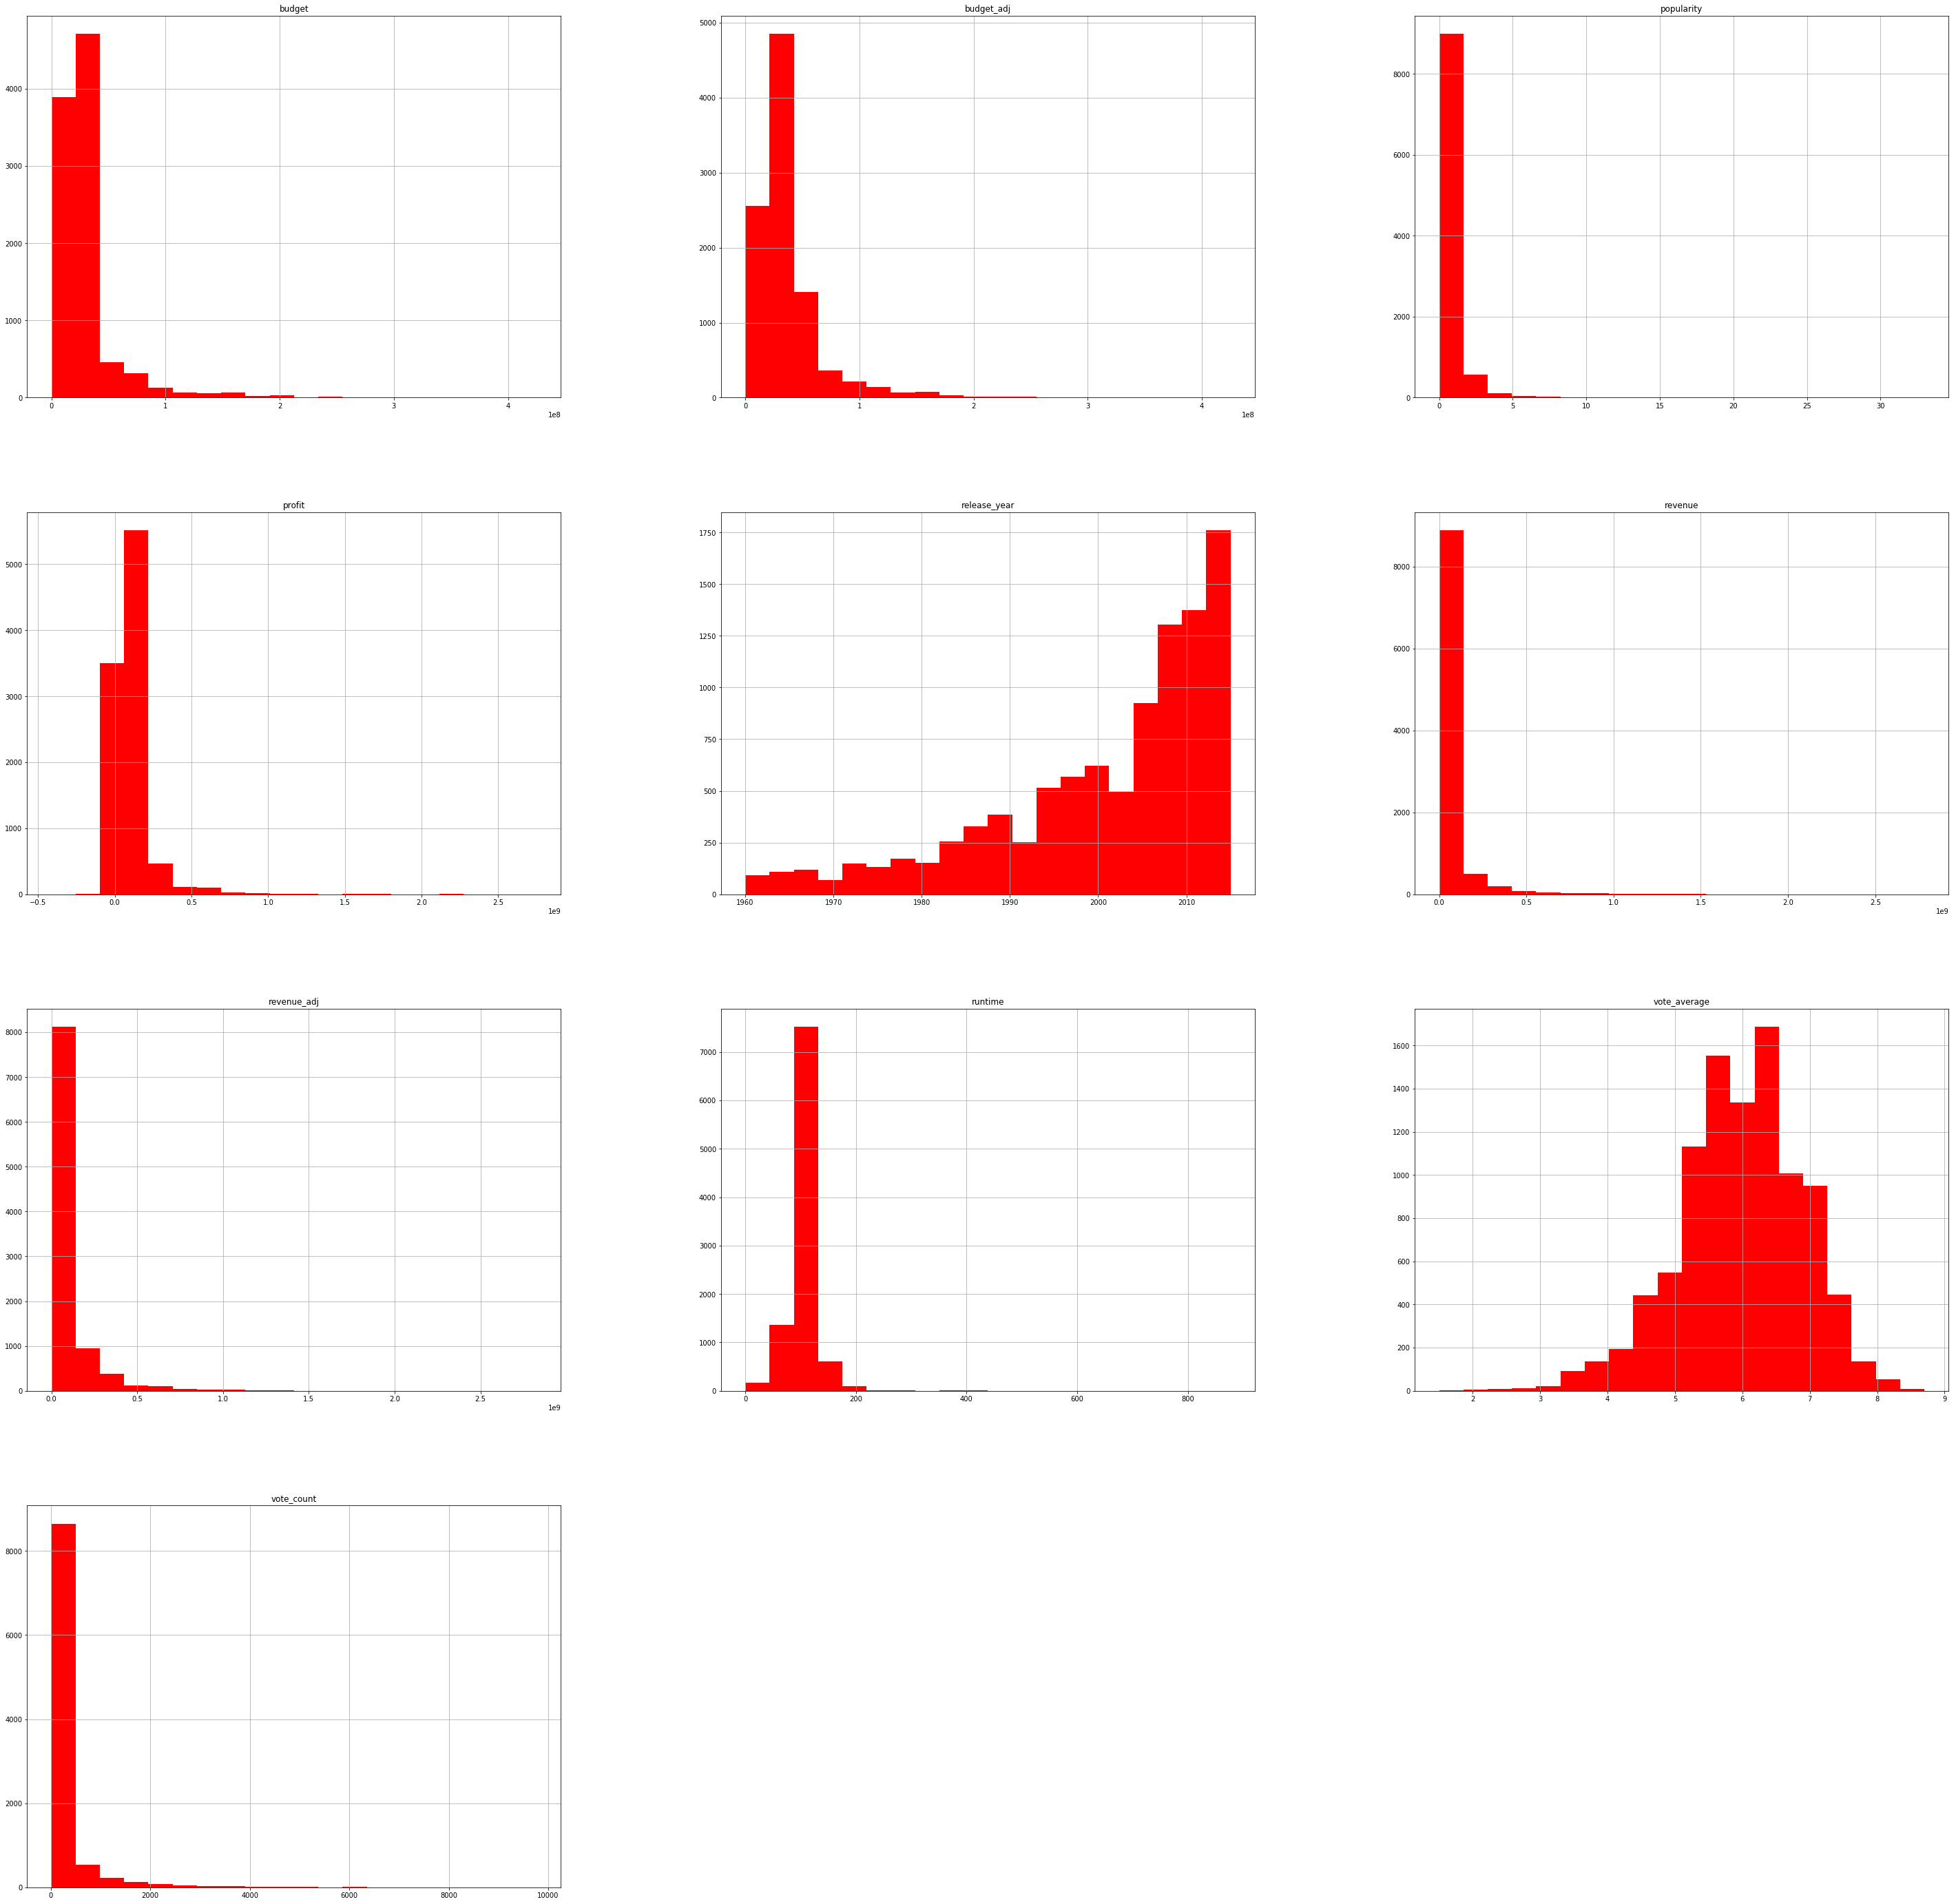

In [22]:
# Plotting histogram of data
df.hist(bins=20,figsize=(50,50),color='red');

### Research Question 1 (What are the most profitable movies?)

In [26]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
most_profitable = df.sort_values('profit', ascending=False)
top_movies=most_profitable.loc[:,['original_title', 'profit', 'release_year']]
top_movies.head(20)

,original_title,profit,release_year
1329,Star Wars,2.750137e+09,1977
1386,Avatar,2.586237e+09,2009
5231,Titanic,2.234714e+09,1997
10594,The Exorcist,2.128036e+09,1973
9806,Jaws,1.878643e+09,1975
8889,E.T. the Extra-Terrestrial,1.767968e+09,1982
3,Star Wars: The Force Awakens,1.718723e+09,2015
8094,The Net,1.551568e+09,1995
10110,One Hundred and One Dalmatians,1.545635e+09,1961
7309,The Empire Strikes Back,1.376998e+09,1980


In [5]:
# User defined function to avoid repetition of code when plotting
def plot_bar(col1,col2,plot_type):
    plt.figure(figsize=(16,8))
    df.groupby(col1)[col2].mean().sort_values(ascending=False)[:20].plot(kind=plot_type)
#     plt.title("")
#     plt.xlabel("")
#     plt.ylabel("")

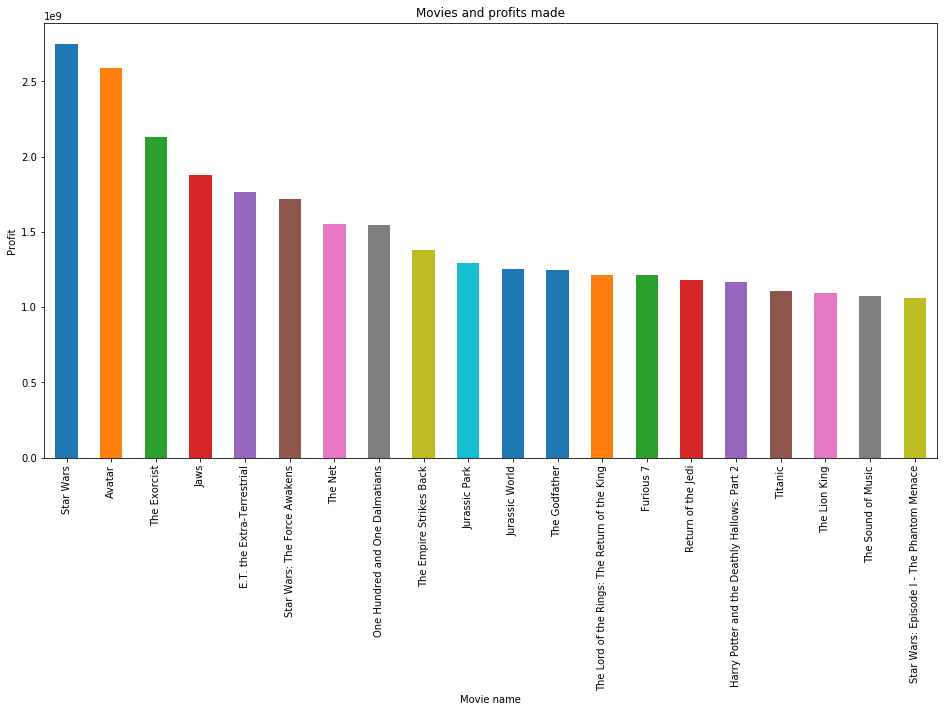

In [8]:
# Plotting bar graph of movies and profits made

# plt.figure(figsize=(50 * .5, 30 * .5))
# df.groupby('original_title')['profit'].mean().sort_values(ascending=False)[:20].plot(kind="bar")

plot_bar('original_title','profit','bar') # Calling pre-defined function and passing arguments
plt.title('Movies and profits made')
plt.xlabel('Movie name')
plt.ylabel('Profit');

> According to the analysis made above, it is evident that __Star Wars__ is the most profitable movie

### Research Question 2  (What are the highly voted movies and their profits?)

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
vote = df.sort_values('vote_count', ascending=False)
top_movies=vote.loc[:,['original_title', 'vote_count', 'release_year']]
top_movies.head(20)

,original_title,vote_count,release_year
1919,Inception,9767,2010
4361,The Avengers,8903,2012
1386,Avatar,8458,2009
2875,The Dark Knight,8432,2008
4364,Django Unchained,7375,2012
4382,The Hunger Games,7080,2012
5425,Iron Man 3,6882,2013
4363,The Dark Knight Rises,6723,2012
629,Interstellar,6498,2014
4367,The Hobbit: An Unexpected Journey,6417,2012


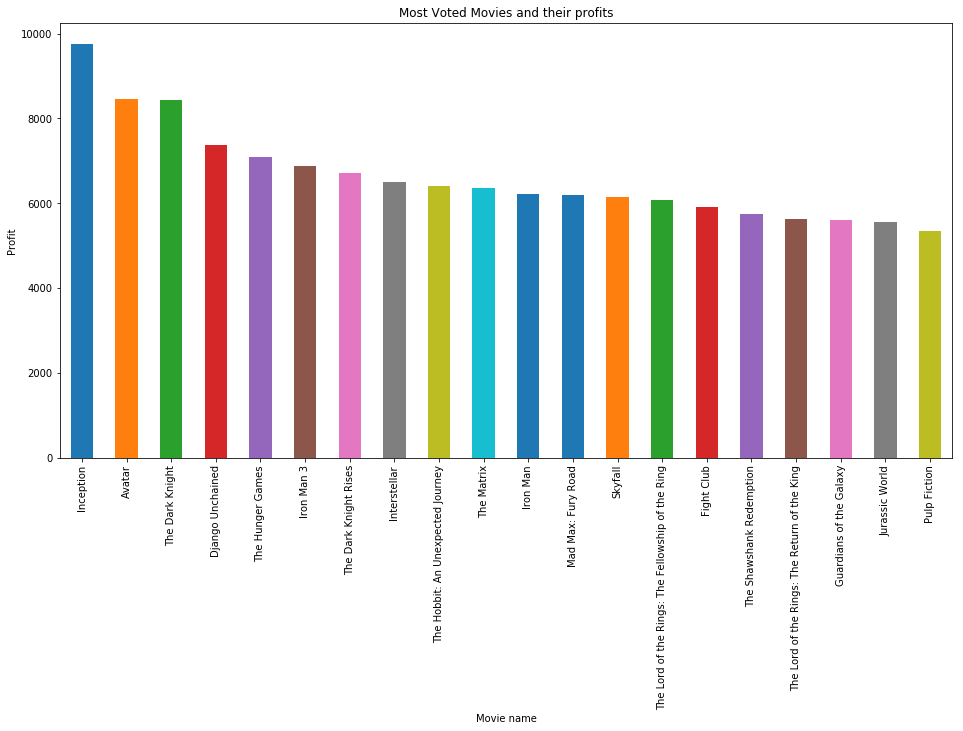

In [9]:
# Plotting bar graph of most voted movies and their profits

# plt.figure(figsize=(50 * .5, 30 * .5))
# df.groupby('original_title')['vote_count'].mean().sort_values(ascending=False)[:20].plot(kind="bar")

plot_bar('original_title', 'vote_count', 'bar') # Calling pre-defined function and passing arguments
plt.title('Most Voted Movies and their profits')
plt.xlabel('Movie name')
plt.ylabel('Profit');

> According to the analysis made above, vote count and profit have a positive correlation. It is evident that __Inception__ is the most voted movie and it have the highest profit.

### Research Question 3  (What is the trend in annual movie release?)

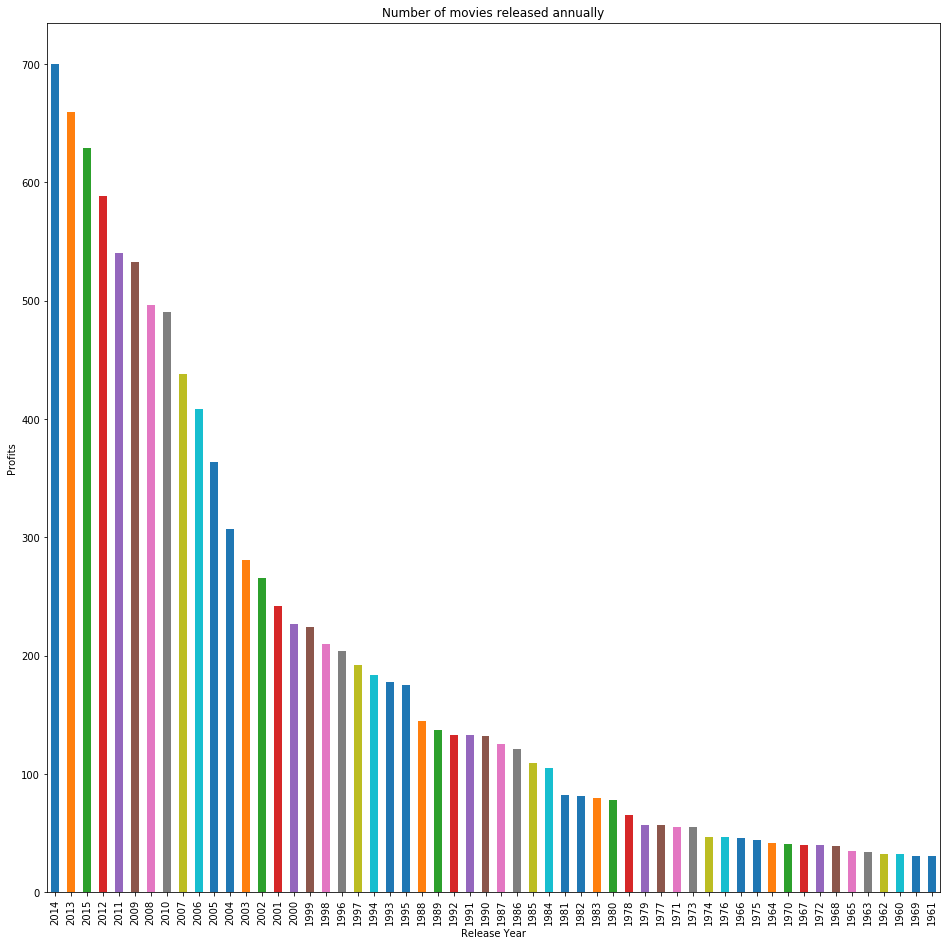

In [19]:
# Plotting graph of number of movies released annually

df['release_year'].value_counts().plot(kind='bar', figsize=(16,16));
plt.title('Number of movies released annually')
plt.xlabel('Release Year');
plt.ylabel('Profits');

> According to the analysis made above, I have observed that the number of movies released increases annually.

### Research Question 4  (What is the annual profits made from movies?)

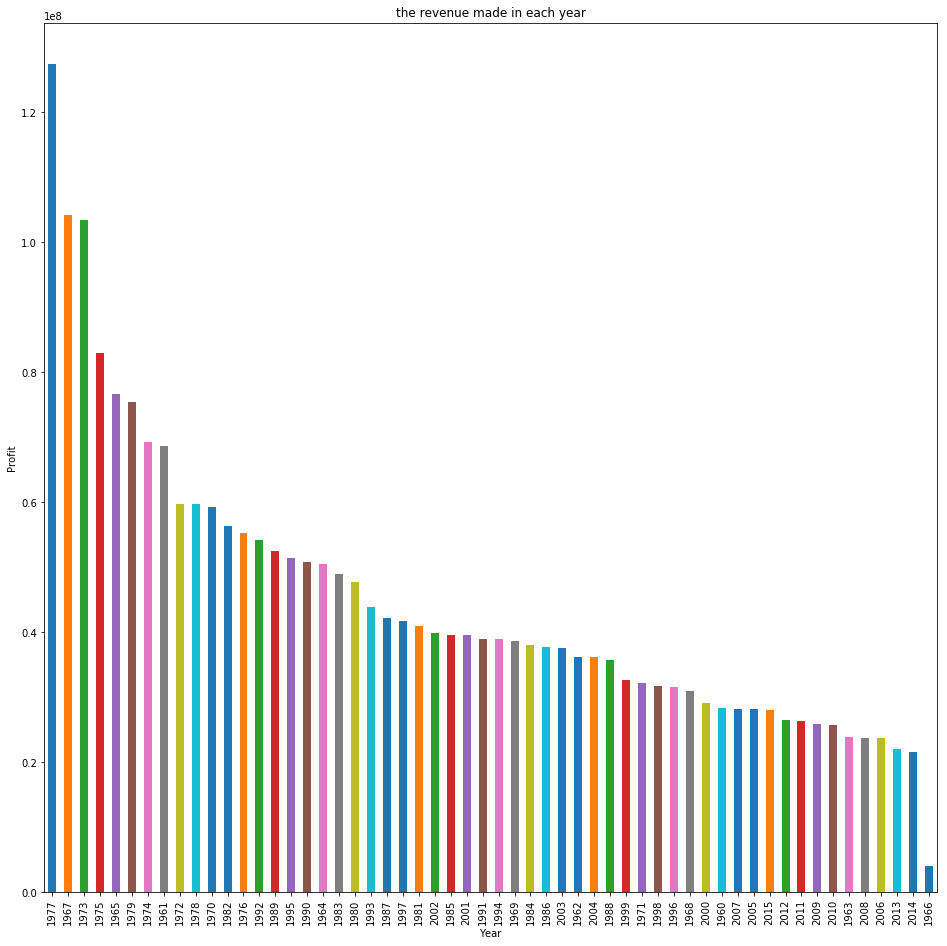

In [11]:
# Plotting a bar chart between the years and profits made from movies

df.groupby('release_year')['profit'].mean().sort_values(ascending=False).plot(kind="bar", figsize=(16,16))


# plot_bar('release_year', 'profit', 'bar') # Function is giving the first 20 data so I have not used it here as I want all output
plt.title('the revenue made in each year')
plt.xlabel('Year')
plt.ylabel('Profit');

> According to the analysis made above, I have observed that highest profit was made in the year 1977 and the least profit was made in the year 1966.

### Research Question 5  (What is the comparison between popularity and profits made from movies?)

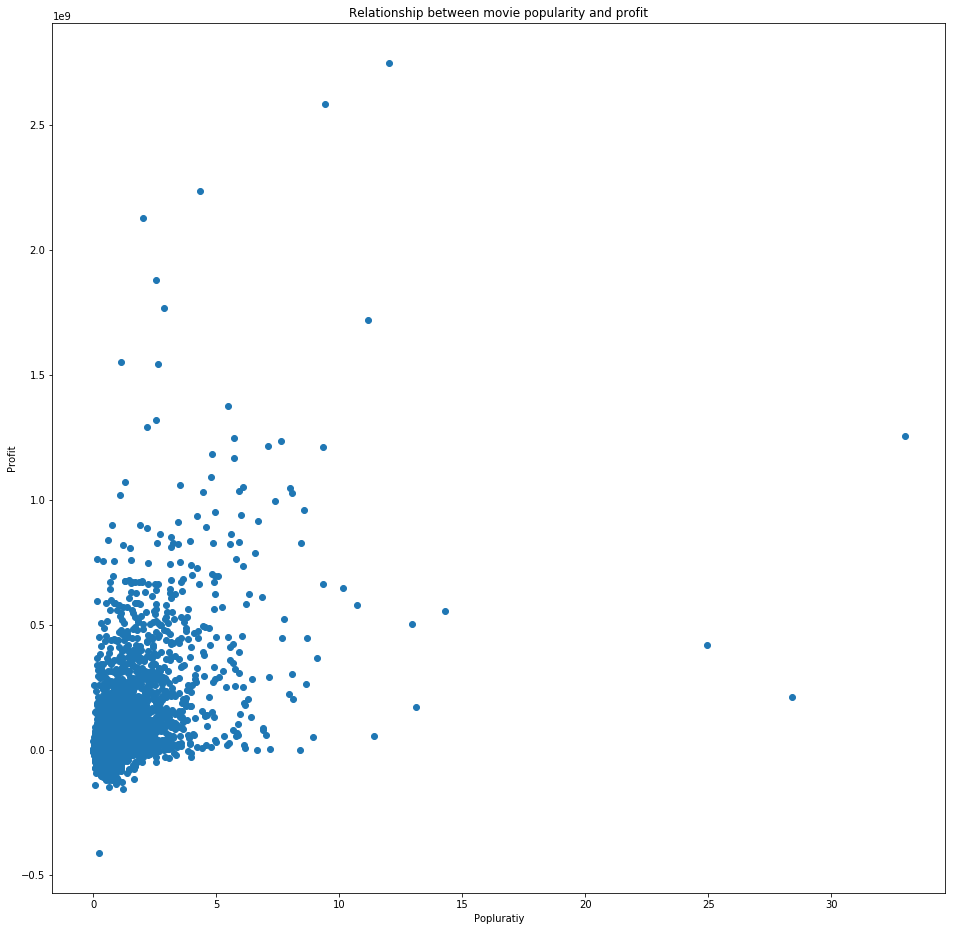

In [17]:
# Plotting the relationship between popularity and profits made from movies
plt.figure(figsize=(16,16))
plt.scatter('popularity', 'profit', data=df)
plt.title('Relationship between movie popularity and profit')
plt.xlabel('Popluratiy')
plt.ylabel('Profit')
plt.show()

> From the above plot, it may be observed that there is a slight positive correlation between movie __popularity__ and __profit__ made, that is profit increases with increase in movie popularity.

<a id='conclusions'></a>
## Conclusions
> From graph of _**Most Voted Movies and their profits**_, I have observed that vote count have influence on profit made. Therefore, profit increases with increase in vote count.

> The number of movies released, increase annually, hence movie production may be a great venture.

> Whenever movie becomes popular, profit seems to increase.

### Limitations
> Dropping alot of data due to the zero values leads to losing of a lot of data, hence we may not get the right insights from the data.


In [12]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0